# Machine Learning Lab 1

## Assignment 2 (Deadline : 22/10/2020 11:59PM)

Total Points : 50

### 1. Read the data into numpy array

In [155]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn 
import matplotlib.pyplot as plt
from IPython.display import HTML, display

In [156]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
df = pd.read_csv('assignment2.csv')
df.reset_index(inplace=True)
df.rename(columns={'index':'x1','2':'x2','1':'y'}, inplace = True)

### 2. Plot and Explore the data to get a better understanding

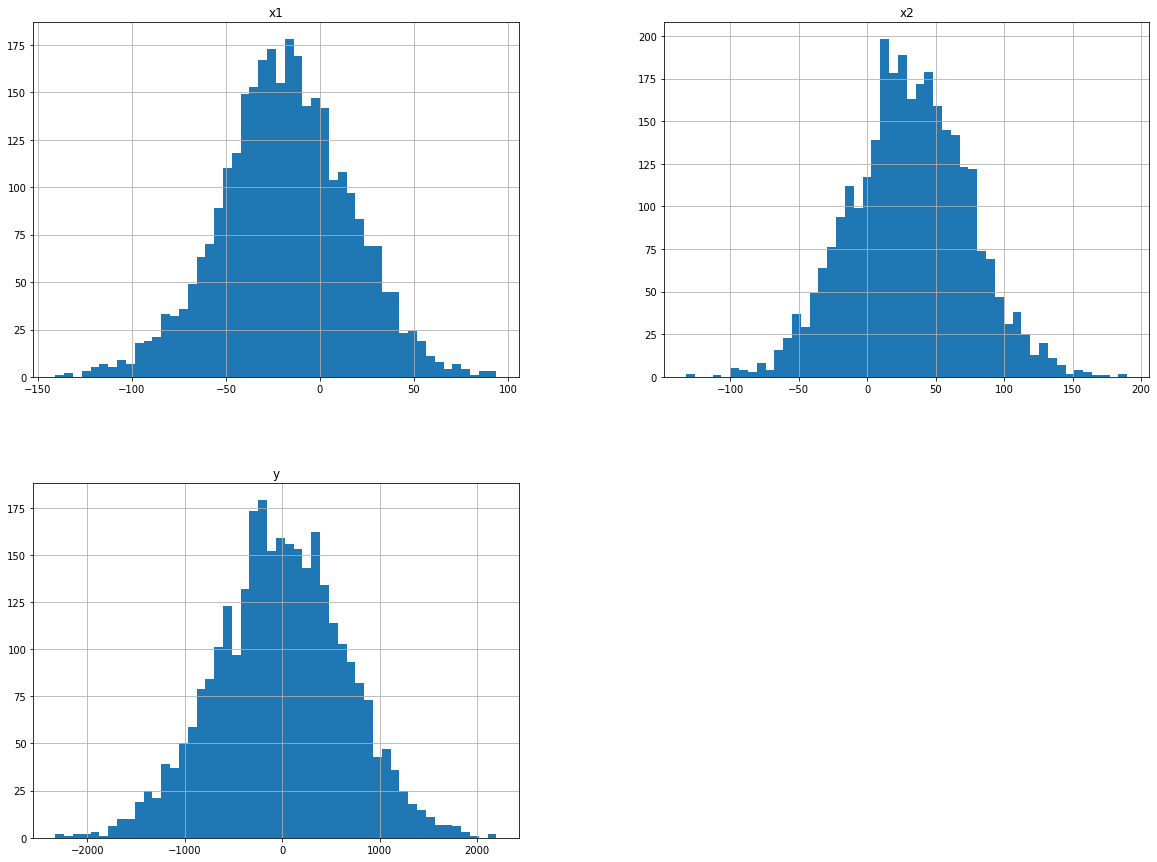

In [159]:
df.hist(bins=50, figsize=(20,15))
plt.show()

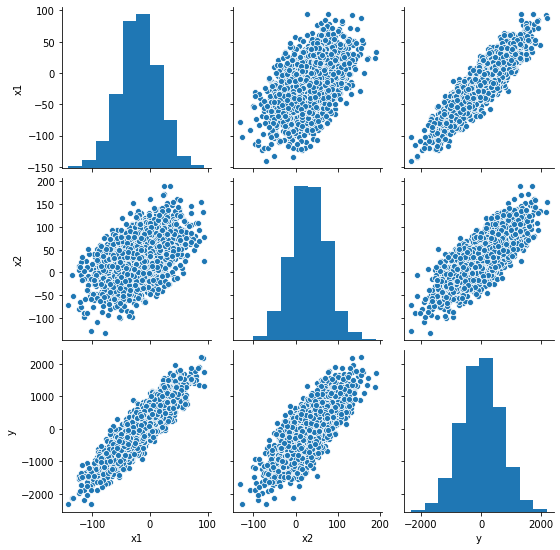

In [146]:
seaborn.pairplot(df) 
plt.show()

### 3. Prepare the data for modelling. (8 points)

In [147]:
# Separate the data: input and output.
trainI = df[['x1','x2']]
trianO = df['y']
trainS = trainI.shape[0]
const = pd.DataFrame(np.ones(trainS))
trainI = pd.concat([const,trainI], axis = 'columns')
df.corr()['y']

x1    0.890029
x2    0.786392
y     1.000000
Name: y, dtype: float64

In [148]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
# For your reference: you can use "train_test_split" from sklearn twice to perform this. 
X_split, X_test, y_split, y_test = train_test_split(trainI, trianO, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_split, y_split, test_size=0.25, random_state=42)

* From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not?
* From the correlation of the features with the output, we observe that both the features are closely related to the output and we cannot distinctly divide the output based on one single feature or none of the features affect the output more significantly than the other. Hence, stratified sampling in not necessary in this case.

### 4. Modelling

#### 4.1. Linear Regression (8 points)

In [149]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
lr = LinearRegression().fit(X_split, y_split)
train_prediction = lr.predict(X_split)
test_prediction = lr.predict(X_test)
train_score = lr.score(X_split, y_split)
test_score = lr.score(X_test, y_test)
print('test_score', test_score)

0.951393653409172

#### 4.2. Ridge Regression (8 points)

In [150]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
alphas = np.linspace(0.001, 500, 1000)
ridge = RidgeCV(alphas=alphas).fit(X_split, y_split)
train_score = ridge.score(X_val, y_val)
train_ridge_prediction = ridge.predict(X_split)
test_ridge_prediction = ridge.predict(X_test)
print('ridge.alpha_', ridge.alpha_)
print('rridge.coef_', ridge.coef_)

ridge.alpha_ 344.84515515515517
rridge.coef_ [ 0.         12.72506742  7.08385894]


#### 4.3. Lasso Regression (8 points)

In [151]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
alphas = np.linspace(0.001, 1000,10000)
lasso = LassoCV(alphas=alphas).fit(X_split, np.array(y_split))
train_score = ridge.score(X_split, y_split)
train_lasso_prediction = lasso.predict(X_split)
test_lasso_prediction = lasso.predict(X_test)
print('lasso.alpha_', lasso.alpha_)
print('lasso.coef_', lasso.coef_)

lasso.alpha_ 0.6010594059405941
lasso.coef_ [ 0.         12.72658615  7.08348079]


#### 4.4. ElasticNet Regression (8 points)

In [152]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
alphas = np.linspace(0.001, 100,1000)
l1_ratios = np.linspace(0.01, 1,10)
cv_model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas)
cv_model.fit(X_split, y_split)
train_elasticNetCV_prediction = cv_model.predict(X_split)
test_elasticNetCV_prediction = cv_model.predict(X_test)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.60159459
Optimal l1_ratio: 1.000
Number of iterations 8


### 5. Analysis (8 points)

In [153]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.
analysis = pd.DataFrame()
analysis['Test Output'] = y_test
analysis['LinearRegression Output'] = test_prediction
analysis['Ridge Output'] = test_ridge_prediction
analysis['Lasso Output'] = test_lasso_prediction
analysis['Elastic reg out'] = test_elasticNetCV_prediction
analysis.head(10)

,Test Output,LinearRegression Output,Ridge Output,Lasso Output,Elastic reg out
1801,66.12,61.235630,61.233656,61.233406,61.233404
1190,-572.89,-576.474002,-576.481070,-576.452311,-576.452300
1817,-94.71,-112.489283,-112.494006,-112.484719,-112.484717
251,-306.84,-413.460170,-413.412922,-413.455248,-413.455236
2505,580.10,602.521612,602.433865,602.517197,602.517179
1117,-34.05,-19.808152,-19.791247,-19.811262,-19.811261
1411,-81.37,-172.968197,-172.934816,-172.969120,-172.969114
2113,552.60,601.278257,601.216628,601.268637,601.268621
408,-24.39,-42.406417,-42.445993,-42.397364,-42.397366
2579,538.47,558.283905,558.244601,558.271341,558.271326


In [154]:
print("---------------------------------------------------------------------------------")
print('RMSE for Linear Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_prediction)))
print('RMSE for Linear Regression for Test data: ',np.sqrt(mean_squared_error(y_test,test_prediction)))
print('MAE for Linear Regression for Train+Valid data: ',mean_absolute_error(y_split,train_prediction))
print('MAE for Linear Regression for Test data: ',mean_absolute_error(y_test,test_prediction))
print("---------------------------------------------------------------------------------")
print('RMSE for Ridge Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_ridge_prediction)))
print('RMSE for Ridge Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_lasso_prediction)))
print('MAE for Ridge Regression for Train+Valid data: ',mean_absolute_error(y_split, train_ridge_prediction))
print('MAE for Ridge Regression for Test data: ',mean_absolute_error(y_test, test_lasso_prediction))
print("---------------------------------------------------------------------------------")
print('RMSE for Ridge Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_lasso_prediction)))
print('RMSE for Ridge Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_lasso_prediction)))
print('MAE for Ridge Regression for Train+Valid data: ',mean_absolute_error(y_split, train_lasso_prediction))
print('MAE for Ridge Regression for Test data: ',mean_absolute_error(y_test, test_lasso_prediction))
print("---------------------------------------------------------------------------------")
print('RMSE for ElasticNet Regression for Train and Valid data: ',np.sqrt(mean_squared_error(y_split, train_elasticNetCV_prediction)))
print('RMSE for ElasticNet Regression for Test data: ',np.sqrt(mean_squared_error(y_test, test_elasticNetCV_prediction)))
print('MAE for ElasticNet Regression for Train+Valid data: ',mean_absolute_error(y_split, train_elasticNetCV_prediction))
print('MAE for ElasticNet Regression for Test data: ',mean_absolute_error(y_test, test_elasticNetCV_prediction))
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
RMSE for Linear Regression for Train and Valid data:  151.58756422068186
RMSE for Linear Regression for Test data:  148.47388000962516
MAE for Linear Regression for Train+Valid data:  120.77989321708048
MAE for Linear Regression for Test data:  118.72866511674283
---------------------------------------------------------------------------------
RMSE for Ridge Regression for Train and Valid data:  151.5875737949316
RMSE for Ridge Regression for Test data:  148.4732299322618
MAE for Ridge Regression for Train+Valid data:  120.78073742493201
MAE for Ridge Regression for Test data:  118.72796609932276
---------------------------------------------------------------------------------
RMSE for Ridge Regression for Train and Valid data:  151.5875649108729
RMSE for Ridge Regression for Test data:  148.4732299322618
MAE for Ridge Regression for Train+Valid data:  120.78007761950833
MAE for Ridge Regression for Test 

### 6. Final Observations (2 points)

# Write down your final conclusions/observations.
As we can see from the RMSE and MAE errors above, the errors are almost similar for the 4 models. Hence,we can say that the regularization does not have much effect on the model. Linear regression would be best in this scenario as their would be less processing required without any regularization.Further, the coeffients of x1 and x2 obtained from the 4 models also come out to be close. 